In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pd.set_option('display.max_columns', 90)
pd.set_option('display.max_rows', 90)

In [2]:
wrangled_data = pd.read_csv('wrangled_data.csv')
wrangled_data.shape

(99685, 28)

In [3]:
wrangled_data.head(10)

,id,term,home_ownership,verification_status,issue_d,loan_status,application_type,hardship_flag,debt_settlement_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
0,132555889,0.0,1.0,0.0,May-2018,Current,0.0,0.0,0.0,11000.0,10.90,359.61,36000.0,16.10,0.0,679.0,2.0,22.0,0.0,40.1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
1,69743499,0.0,0.0,1.0,Jan-2016,Fully Paid,0.0,0.0,0.0,12000.0,6.99,370.48,86000.0,19.84,0.0,689.0,1.0,19.0,0.0,30.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,63590274,0.0,1.0,0.0,Nov-2015,Fully Paid,0.0,0.0,0.0,5000.0,12.05,166.20,25000.0,16.95,0.0,664.0,0.0,6.0,0.0,30.5,10.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
3,42364040,0.0,1.0,2.0,Apr-2015,Fully Paid,0.0,0.0,0.0,20000.0,15.61,699.30,40000.0,34.56,0.0,709.0,0.0,10.0,0.0,60.9,17.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
4,144254317,0.0,1.0,0.0,Nov-2018,Current,0.0,0.0,0.0,5000.0,18.94,183.13,68000.0,35.58,16.0,664.0,0.0,15.0,0.0,80.9,42.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
5,113158590,0.0,0.0,1.0,Jul-2017,Current,0.0,0.0,0.0,5500.0,7.97,172.28,32000.0,19.65,0.0,714.0,1.0,7.0,1.0,24.1,18.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
6,95107794,0.0,2.0,0.0,Dec-2016,Fully Paid,0.0,0.0,0.0,20000.0,8.24,628.95,265000.0,10.36,4.0,679.0,0.0,21.0,0.0,57.1,35.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
7,91287287,0.0,1.0,1.0,Oct-2016,Current,0.0,0.0,0.0,1500.0,13.49,50.90,50000.0,21.89,0.0,689.0,0.0,8.0,0.0,67.4,10.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
8,531394,0.0,0.0,2.0,Jun-2010,Fully Paid,0.0,0.0,0.0,19750.0,11.12,647.72,74700.0,19.98,0.0,719.0,2.0,9.0,0.0,80.8,13.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
9,44046074,0.0,1.0,1.0,Mar-2015,Fully Paid,0.0,0.0,0.0,2400.0,13.33,81.25,30000.0,19.76,1.0,664.0,0.0,6.0,0.0,37.8,16.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0


# Split data into specifc loan status' to look at trends

In [4]:
wrangled_data['loan_status'].value_counts()

Fully Paid                                             47221
Current                                                39061
Charged Off                                            11796
Late (31-120 days)                                       949
In Grace Period                                          368
Late (16-30 days)                                        180
Does not meet the credit policy. Status:Fully Paid        82
Does not meet the credit policy. Status:Charged Off       27
Default                                                    1
Name: loan_status, dtype: int64

In [5]:
# group data in catagories to see unique trends 
# --> Fully Paid, Charged Off, current but late: [Late (31-120 days), In Grace Period, Late (16-30 days)
# ignore does not meet values and default for low sample size

fully_paid = wrangled_data[wrangled_data['loan_status'] == 'Fully Paid']
charged_off = wrangled_data[wrangled_data['loan_status'] == 'Charged Off']
current = wrangled_data[wrangled_data['loan_status'] == 'Current']

late_values = ['Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)']
late = wrangled_data[wrangled_data.loan_status.isin(late_values)]

In [6]:
fully_paid_means = fully_paid.mean()

In [7]:
charged_off_means = charged_off.mean()

In [8]:
current_means = current.mean()

In [9]:
late_means = late.mean()

# Look at means of each column to look at trends

In [10]:
# create df with means grouped by loan status

mean_df = pd.DataFrame(list(zip(fully_paid_means, charged_off_means, current_means, late_means)))

In [11]:
mean_df.head()

,0,1,2,3
0,5.544739e+07,6.008992e+07,1.163190e+08,1.086323e+08
1,2.048241e-01,3.966599e-01,3.535496e-01,4.215097e-01
2,5.899494e-01,6.685317e-01,6.282737e-01,6.940548e-01
3,9.147625e-01,9.635470e-01,8.329280e-01,8.717435e-01
4,1.793693e-02,2.322821e-02,1.020199e-01,1.008684e-01


In [12]:
mean_df = mean_df.T

In [13]:
mean_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,5.544739e+07,0.204824,0.589949,0.914762,0.017937,0.000000,0.000000,14158.777345,12.605907,431.739425,77796.971754,17.848067,0.302916,702.313547,0.623473,11.488575,0.207662,51.136355,25.086318,0.016603,0.004765,0.009170,13.821202,0.130217,0.050232,6.180238
1,6.008992e+07,0.396660,0.668532,0.963547,0.023228,0.000000,0.123262,15749.048406,15.702034,470.313931,70705.953961,20.120824,0.346134,691.964225,0.778060,11.989234,0.250933,54.757764,24.844439,0.022550,0.006358,0.010003,23.653442,0.157172,0.059512,58.425568
2,1.163190e+08,0.353550,0.628274,0.832928,0.102020,0.000000,0.000000,15837.591844,12.806350,452.992800,79909.641308,19.706867,0.284350,706.792043,0.448708,11.595581,0.165613,47.908597,22.885333,0.018356,0.002458,0.007757,5.872072,0.117790,0.035073,4.342234
3,1.086323e+08,0.421510,0.694055,0.871743,0.100868,0.020708,0.023380,17226.419506,15.537756,507.515585,77009.765745,19.973494,0.414830,697.740815,0.617902,11.571142,0.201737,49.802538,22.935204,0.022044,0.005344,0.009352,9.521042,0.134269,0.047428,15.901136


In [14]:
# add column header

mean_labels = list(wrangled_data.columns)

In [15]:
mean_labels

['id',
 'term',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'application_type',
 'hardship_flag',
 'debt_settlement_flag',
 'loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'pub_rec_bankruptcies',
 'tax_liens',
 'last_fico_range']

In [16]:
mean_labels.remove('issue_d')
mean_labels.remove('loan_status')

In [17]:
mean_df.columns = mean_labels

In [18]:
mean_df

,id,term,home_ownership,verification_status,application_type,hardship_flag,debt_settlement_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
0,5.544739e+07,0.204824,0.589949,0.914762,0.017937,0.000000,0.000000,14158.777345,12.605907,431.739425,77796.971754,17.848067,0.302916,702.313547,0.623473,11.488575,0.207662,51.136355,25.086318,0.016603,0.004765,0.009170,13.821202,0.130217,0.050232,6.180238
1,6.008992e+07,0.396660,0.668532,0.963547,0.023228,0.000000,0.123262,15749.048406,15.702034,470.313931,70705.953961,20.120824,0.346134,691.964225,0.778060,11.989234,0.250933,54.757764,24.844439,0.022550,0.006358,0.010003,23.653442,0.157172,0.059512,58.425568
2,1.163190e+08,0.353550,0.628274,0.832928,0.102020,0.000000,0.000000,15837.591844,12.806350,452.992800,79909.641308,19.706867,0.284350,706.792043,0.448708,11.595581,0.165613,47.908597,22.885333,0.018356,0.002458,0.007757,5.872072,0.117790,0.035073,4.342234
3,1.086323e+08,0.421510,0.694055,0.871743,0.100868,0.020708,0.023380,17226.419506,15.537756,507.515585,77009.765745,19.973494,0.414830,697.740815,0.617902,11.571142,0.201737,49.802538,22.935204,0.022044,0.005344,0.009352,9.521042,0.134269,0.047428,15.901136


In [19]:
# add index titles

index_names = mean_df['index'] = ['fully_paid_means', 'charged_off_means', 'current_means', 'late_means']

In [20]:
mean_df.set_index('index')

,id,term,home_ownership,verification_status,application_type,hardship_flag,debt_settlement_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
index,,,,,,,,,,,,,,,,,,,,,,,,,,
fully_paid_means,5.544739e+07,0.204824,0.589949,0.914762,0.017937,0.000000,0.000000,14158.777345,12.605907,431.739425,77796.971754,17.848067,0.302916,702.313547,0.623473,11.488575,0.207662,51.136355,25.086318,0.016603,0.004765,0.009170,13.821202,0.130217,0.050232,6.180238
charged_off_means,6.008992e+07,0.396660,0.668532,0.963547,0.023228,0.000000,0.123262,15749.048406,15.702034,470.313931,70705.953961,20.120824,0.346134,691.964225,0.778060,11.989234,0.250933,54.757764,24.844439,0.022550,0.006358,0.010003,23.653442,0.157172,0.059512,58.425568
current_means,1.163190e+08,0.353550,0.628274,0.832928,0.102020,0.000000,0.000000,15837.591844,12.806350,452.992800,79909.641308,19.706867,0.284350,706.792043,0.448708,11.595581,0.165613,47.908597,22.885333,0.018356,0.002458,0.007757,5.872072,0.117790,0.035073,4.342234
late_means,1.086323e+08,0.421510,0.694055,0.871743,0.100868,0.020708,0.023380,17226.419506,15.537756,507.515585,77009.765745,19.973494,0.414830,697.740815,0.617902,11.571142,0.201737,49.802538,22.935204,0.022044,0.005344,0.009352,9.521042,0.134269,0.047428,15.901136


In [21]:
# we can see some clear trends here for better loans for the bank:

# keep the term short
# home ownership is better
# fully verified is better
# no hardship flags
# no debt settlement flags
# keep the loan amount small
# lower interest rate is better
# smaller installment is better
# debt to income smaller is better
# total_acc seems to do better with more accounts... interesting
# collections_12_mths_ex_med
# tax_liens do better with more... interesting

In [22]:
# columns with little impact:

# annual income has little impact
# dueling_2yrs 
# fico
# open accts
# pub_rec
# revol_util
# acc_now_delinq
# chargeoff_within_12_mths
# delinq_amnt
# pub_rec_bankruptcies
# last fico range

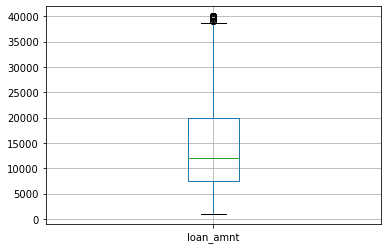

In [23]:
fully_paid.boxplot(column='loan_amnt')

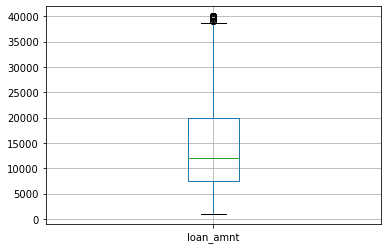

In [24]:
fully_paid.boxplot(column='loan_amnt')

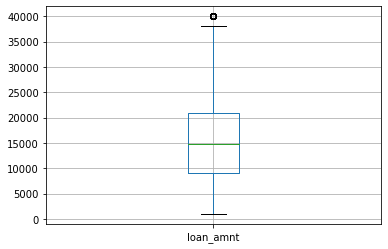

In [25]:
charged_off.boxplot(column='loan_amnt')

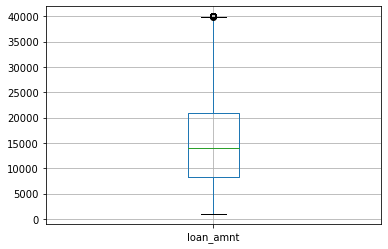

In [26]:
current.boxplot(column='loan_amnt')

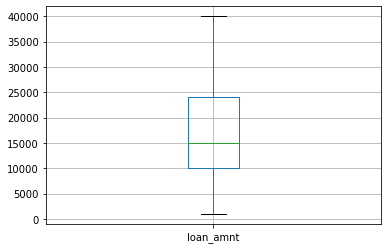

In [27]:
late.boxplot(column='loan_amnt')

# Look at stdev of each column to look at trends

In [28]:
# talk with Tony have how to do this with more efficient code

In [29]:
# i want to see a boxplot for each column based off the different loan status'. What efficient code can do this?

# Look at corr() for each

In [30]:
wrangled_data.corr()

,id,term,home_ownership,verification_status,application_type,hardship_flag,debt_settlement_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
id,1.000000,0.008258,0.031270,-0.090845,0.230529,0.011865,-0.045104,0.040399,-0.044719,0.028444,0.029916,0.055253,-0.013803,0.107666,-0.133866,0.009027,-0.012598,-0.180803,-0.088629,0.017357,-0.018144,-0.003381,-0.003801,0.016653,-0.016919,-0.049360
term,0.008258,1.000000,-0.090869,0.029952,0.068258,0.005072,0.025118,0.392228,0.372270,0.136716,0.058449,0.050121,-0.012855,0.014173,-0.001304,0.076352,-0.020744,0.064414,0.093809,-0.009177,-0.003557,0.002205,-0.000258,-0.012392,-0.011482,0.002715
home_ownership,0.031270,-0.090869,1.000000,-0.035897,-0.066189,0.000759,0.006688,-0.139747,0.051234,-0.111944,-0.119551,-0.014258,-0.032427,-0.053761,-0.023234,-0.100802,0.001607,-0.048724,-0.157799,0.009651,-0.004833,-0.003873,0.002978,-0.001594,0.004350,0.027089
verification_status,-0.090845,0.029952,-0.035897,1.000000,0.050406,0.002432,0.011582,0.068193,0.104258,0.076881,-0.027018,0.085969,-0.009468,0.008662,0.041459,0.024930,-0.011708,0.047614,0.042549,-0.002139,0.009276,0.003052,-0.001324,-0.006279,-0.006102,0.000366
application_type,0.230529,0.068258,-0.066189,0.050406,1.000000,0.011110,-0.019438,0.114570,0.027966,0.098182,-0.059876,0.220103,-0.012499,0.094921,-0.051603,-0.018724,-0.013943,-0.034048,-0.033325,-0.008193,-0.010938,-0.008275,-0.004129,0.001859,-0.014442,-0.016872
hardship_flag,0.011865,0.005072,0.000759,0.002432,0.011110,1.000000,-0.002172,0.008044,0.009873,0.008401,-0.000501,-0.000674,-0.000252,-0.001660,-0.004439,0.002296,-0.002007,0.000987,-0.000526,0.001697,-0.001068,0.004078,-0.000326,-0.003085,0.000838,-0.002231
debt_settlement_flag,-0.045104,0.025118,0.006688,0.011582,-0.019438,-0.002172,1.000000,0.010966,0.055827,0.012896,-0.012826,0.015468,0.009358,-0.039742,0.016740,0.016189,0.006457,0.023069,0.019240,0.000063,0.006137,-0.000784,0.003329,0.008272,-0.001521,0.023613
loan_amnt,0.040399,0.392228,-0.139747,0.068193,0.114570,0.008044,0.010966,1.000000,0.095000,0.945167,0.315965,0.040003,-0.014438,0.113594,-0.024878,0.182091,-0.059046,0.095336,0.194428,-0.017591,-0.002255,0.000534,-0.001077,-0.084687,0.004204,-0.025884
int_rate,-0.044719,0.372270,0.051234,0.104258,0.027966,0.009873,0.055827,0.095000,1.000000,0.120988,-0.079191,0.108803,0.065006,-0.414117,0.189869,-0.007472,0.054162,0.259733,-0.038308,0.020995,0.013800,0.014934,0.002524,0.056877,0.016456,0.071775
installment,0.028444,0.136716,-0.111944,0.076881,0.098182,0.008401,0.012896,0.945167,0.120988,1.000000,0.305858,0.041873,-0.001072,0.054835,0.000388,0.171436,-0.045401,0.117229,0.173841,-0.012699,0.001465,0.002030,-0.000589,-0.075312,0.012342,-0.018668


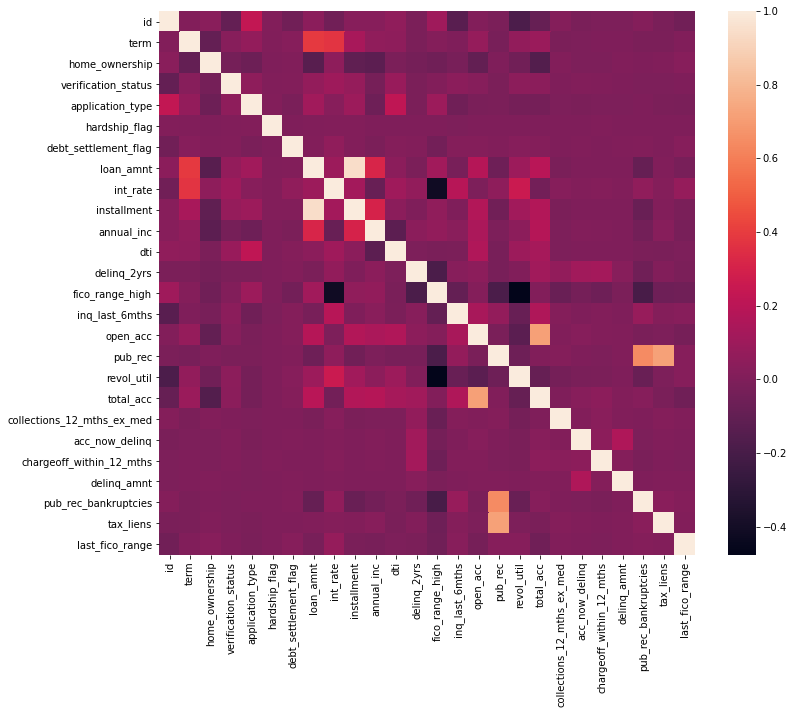

In [31]:
plt.subplots(figsize=(12,10))
sns.heatmap(wrangled_data.corr());

# PCA Analysis

In [32]:
wrangled_data.head()

PCA_wrangled_data = wrangled_data

In [33]:
del PCA_wrangled_data['issue_d']
del PCA_wrangled_data['loan_status']

In [34]:
PCA_wrangled_data_scaled = scale(PCA_wrangled_data)


PCA_wrangled_data_scaled_df = pd.DataFrame(PCA_wrangled_data_scaled, columns=list(wrangled_data.columns))
PCA_wrangled_data_scaled_df.head()


,id,term,home_ownership,verification_status,application_type,hardship_flag,debt_settlement_flag,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,last_fico_range
0,1.156673,-0.63755,0.566508,-1.094311,-0.235973,-0.017637,-0.12314,-0.441184,-0.454214,-0.322850,-0.599929,-0.176770,-0.360552,-0.717365,1.611508,1.850986,-0.33277,-0.410911,-0.013663,-0.122343,-0.060565,-0.085477,-0.018505,-0.351153,-0.111986,-0.126494
1,-0.241376,-0.63755,-0.908660,0.137914,-0.235973,-0.017637,-0.12314,-0.332139,-1.262614,-0.282053,0.118216,0.061602,-0.360552,-0.415492,0.478974,1.317539,-0.33277,-0.818415,1.155268,-0.122343,-0.060565,-0.085477,-0.018505,-0.351153,-0.111986,-0.126494
2,-0.378331,-0.63755,0.566508,-1.094311,-0.235973,-0.017637,-0.12314,-1.095449,-0.216450,-1.048756,-0.757921,-0.122594,-0.360552,-1.170174,-0.653560,-0.994061,-0.33277,-0.798241,-1.182593,-0.122343,-0.060565,-0.085477,-0.018505,-0.351153,-0.111986,-0.126494
3,-0.850775,-0.63755,0.566508,1.370139,-0.235973,-0.017637,-0.12314,0.540215,0.519587,0.952074,-0.542477,0.999793,-0.360552,0.188254,-0.653560,-0.282799,-0.33277,0.428303,-0.598128,-0.122343,-0.060565,-0.085477,-0.018505,-0.351153,-0.111986,-0.126494
4,1.417051,-0.63755,0.566508,-1.094311,-0.235973,-0.017637,-0.12314,-1.095449,1.208071,-0.985214,-0.140316,1.064804,18.722453,-1.170174,-0.653560,0.606278,-0.33277,1.235240,1.489248,-0.122343,-0.060565,-0.085477,-0.018505,-0.351153,-0.111986,-0.126494


In [35]:
PCA_wrangled_data_scaled_df.mean()

id                           -1.718265e-17
term                          1.379372e-15
home_ownership                3.593877e-16
verification_status           2.065916e-15
application_type              1.641619e-15
hardship_flag                 2.042035e-15
debt_settlement_flag         -3.049457e-15
loan_amnt                    -1.708954e-16
int_rate                      2.264205e-16
installment                   1.353128e-16
annual_inc                   -2.273437e-16
dti                          -1.358515e-16
delinq_2yrs                   6.071985e-16
fico_range_high              -9.637117e-18
inq_last_6mths               -1.705192e-15
open_acc                      2.299811e-16
pub_rec                       1.587850e-15
revol_util                    5.030056e-17
total_acc                     1.964717e-16
collections_12_mths_ex_med    1.277351e-15
acc_now_delinq                4.548029e-15
chargeoff_within_12_mths      3.278859e-15
delinq_amnt                   1.264973e-15
pub_rec_ban

In [36]:
PCA_wrangled_data_scaled_df.std()

id                            1.000005
term                          1.000005
home_ownership                1.000005
verification_status           1.000005
application_type              1.000005
hardship_flag                 1.000005
debt_settlement_flag          1.000005
loan_amnt                     1.000005
int_rate                      1.000005
installment                   1.000005
annual_inc                    1.000005
dti                           1.000005
delinq_2yrs                   1.000005
fico_range_high               1.000005
inq_last_6mths                1.000005
open_acc                      1.000005
pub_rec                       1.000005
revol_util                    1.000005
total_acc                     1.000005
collections_12_mths_ex_med    1.000005
acc_now_delinq                1.000005
chargeoff_within_12_mths      1.000005
delinq_amnt                   1.000005
pub_rec_bankruptcies          1.000005
tax_liens                     1.000005
last_fico_range          

In [37]:
loan_pca = PCA().fit(PCA_wrangled_data_scaled_df)

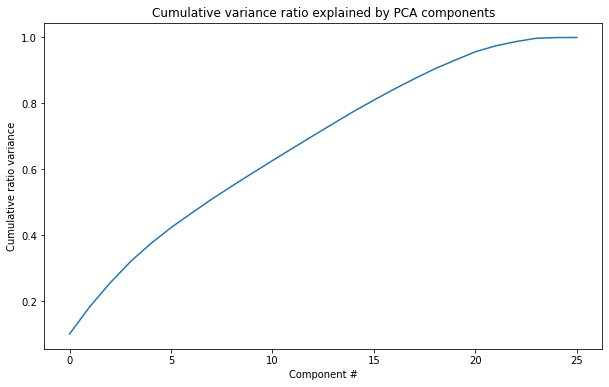

In [38]:
plt.subplots(figsize=(10, 6))
plt.plot(loan_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components');

In [39]:
# the varibales are diluted and not one single variable contributes to a majority of the 
# correlation. Will need to incorporate most of these variables in the modeling portion.

In [40]:
wrangled_data.to_csv('EDA_final_data.csv')